# **UDP FLOOD DDoS ATTACK**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/kddcup_dataset.csv",index_col=0)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
udp_df = df[df.loc[:,"protocol_type"] == "udp"]
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
service_values = np.unique(udp_df.loc[:,"service"])
mid = (len(service_values)+1)/2
for i in range(len(service_values)):
    udp_df = udp_df.replace(service_values[i], (i-mid)/10)
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
features = ["service","src_bytes","dst_bytes","wrong_fragment","count","num_compromised","srv_count","dst_host_srv_count","dst_host_diff_srv_rate"]
target = "result"
X = udp_df.loc[:,features]
y = udp_df.loc[:,target]
classes = np.unique(y)
print(classes)

['multihop.' 'normal.' 'saint.' 'satan.' 'snmpgetattack.' 'snmpguess.'
 'teardrop.' 'udpstorm.']


In [ ]:
#replacing all classes of attack with 1 and normal result with 0 in our icmp_df
for i in range(len(classes)):
    if i == 1:
        udp_df = udp_df.replace(classes[i], 0)
    else:
        udp_df = udp_df.replace(classes[i], 1)

udp_df=udp_df.replace("eco_i",-0.1)
udp_df=udp_df.replace("ecr_i",0.0)
udp_df=udp_df.replace("tim_i",0.1)
udp_df=udp_df.replace("urp_i",0.2)

In [ ]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,0.0,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1


[]

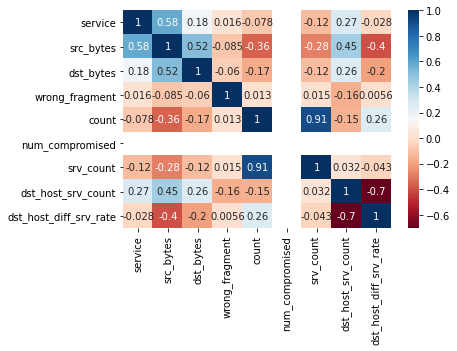

In [ ]:
sns.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
y = udp_df.loc[:,target]
rs = RandomForestClassifier()
rs.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X = X.loc[:,["dst_bytes","service","src_bytes","dst_host_srv_count","count"]]
X.head(20)


,dst_bytes,service,src_bytes,dst_host_srv_count,count
0,146,0.0,105,254,1
1,146,0.0,105,254,1
2,146,0.0,105,254,1
3,146,0.0,105,254,2
4,146,0.0,105,254,2
5,146,0.0,105,255,2
6,0,-0.3,29,3,2
7,146,0.0,105,253,1
8,146,0.0,105,254,2
10,146,0.0,105,254,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","ID3"]
scores = []
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

Accuracy of the model is:  71.13968293596305
Confusion Matrix:
 [[2787 2070]
 [ 242 2912]]
Report:
               precision    recall  f1-score   support

           0       0.92      0.57      0.71      4857
           1       0.58      0.92      0.72      3154

    accuracy                           0.71      8011
   macro avg       0.75      0.75      0.71      8011
weighted avg       0.79      0.71      0.71      8011


==============***===============
Accuracy of the model is:  74.43515166645862
Confusion Matrix:
 [[4046  811]
 [1237 1917]]
Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      4857
           1       0.70      0.61      0.65      3154

    accuracy                           0.74      8011
   macro avg       0.73      0.72      0.72      8011
weighted avg       0.74      0.74      0.74      8011


==============***===============
Accuracy of the model is:  74.36025464985644
Confusion Matrix:
 [[3872  985]
 

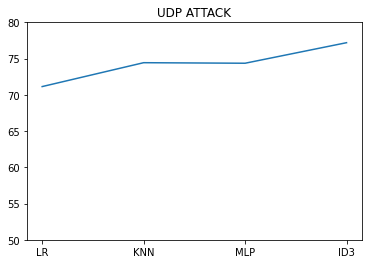

In [ ]:

plt.plot(classifiers,scores)
plt.title("UDP ATTACK")
plt.ylim(50,80)
plt.show()

# **TCP FLOOD DDoS ATTACK**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/kddcup_dataset.csv",index_col=0)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
tcp_syn_df = df[df.loc[:,"protocol_type"] == "tcp"]
tcp_syn_df = tcp_syn_df[tcp_syn_df.loc[:,"srv_serror_rate"] > 0.7]
tcp_syn_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,X11,S1,286040,383476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.00,1.0,0.00,0.0,1.00,0.0,0.0,53,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,normal.
8105,0,tcp,X11,S1,1256,11240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.00,1.0,0.00,0.0,1.00,0.0,0.0,255,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,xsnoop.
34836,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,1,0.24,1.0,0.76,0.0,0.02,1.0,0.0,255,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,saint.
34841,0,tcp,finger,S2,0,334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,1,0.15,1.0,0.84,0.0,0.01,1.0,0.0,255,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,saint.
34864,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,318,1,0.07,1.0,0.93,0.0,0.00,1.0,0.0,255,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,saint.


In [ ]:
service_values = np.unique(tcp_syn_df.loc[:,"service"])
mid = (len(service_values)+1)/2
for i in range(len(service_values)):
    tcp_syn_df = tcp_syn_df.replace(service_values[i], (i-mid)/10)
tcp_syn_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,-2.8,S1,286040,383476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.00,1.0,0.00,0.0,1.00,0.0,0.0,53,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,normal.
8105,0,tcp,-2.8,S1,1256,11240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.00,1.0,0.00,0.0,1.00,0.0,0.0,255,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,xsnoop.
34836,0,tcp,1.1,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,1,0.24,1.0,0.76,0.0,0.02,1.0,0.0,255,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,saint.
34841,0,tcp,-1.5,S2,0,334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,1,0.15,1.0,0.84,0.0,0.01,1.0,0.0,255,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,saint.
34864,0,tcp,1.1,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,318,1,0.07,1.0,0.93,0.0,0.00,1.0,0.0,255,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,saint.


In [ ]:
features = ["service","src_bytes","wrong_fragment","count","num_compromised","srv_count","srv_serror_rate","serror_rate"]
target = "result"
X = tcp_syn_df.loc[:,features]
y =tcp_syn_df.loc[:,target]
classes = np.unique(y)
print(classes)

['apache2.' 'guess_passwd.' 'land.' 'mscan.' 'neptune.' 'nmap.' 'normal.'
 'processtable.' 'saint.' 'satan.' 'warezmaster.' 'xsnoop.']


In [ ]:
for i in range(len(classes)):
    if i == 2:
        tcp_syn_df = tcp_syn_df.replace(classes[i], 0)
    else:
        tcp_syn_df = tcp_syn_df.replace(classes[i], 1)

#turning the service attribute to categorical values
tcp_syn_df=tcp_syn_df.replace("eco_i",-0.1)
tcp_syn_df=tcp_syn_df.replace("ecr_i",0.0)
tcp_syn_df=tcp_syn_df.replace("tim_i",0.1)
tcp_syn_df=tcp_syn_df.replace("urp_i",0.2)

[]

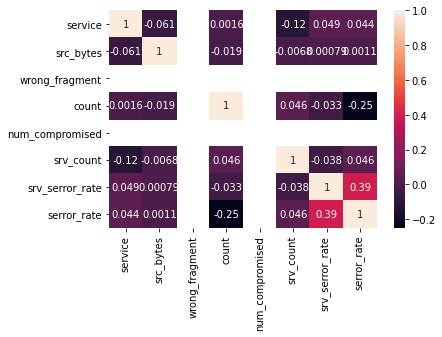

In [ ]:

y =tcp_syn_df.loc[:,target]
sns.heatmap(X.corr(), annot=True)
plt.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rs = RandomForestClassifier()
rs.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X = X.loc[:,["service","count","srv_count","src_bytes","serror_rate"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","ID3"]
scores = []

In [ ]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

Accuracy of the model is:  99.94514536478333
Confusion Matrix:
 [[   0    3]
 [   0 5466]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00      5466

    accuracy                           1.00      5469
   macro avg       0.50      0.50      0.50      5469
weighted avg       1.00      1.00      1.00      5469


==============***===============


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is:  99.98171512159443
Confusion Matrix:
 [[   2    1]
 [   0 5466]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00      5466

    accuracy                           1.00      5469
   macro avg       1.00      0.83      0.90      5469
weighted avg       1.00      1.00      1.00      5469


==============***===============
Accuracy of the model is:  99.94514536478333
Confusion Matrix:
 [[   0    3]
 [   0 5466]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00      5466

    accuracy                           1.00      5469
   macro avg       0.50      0.50      0.50      5469
weighted avg       1.00      1.00      1.00      5469


==============***===============
Accuracy of the model is:  100.0
Confusion Matrix:
 [[   3    0]
 [   0 5466]]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


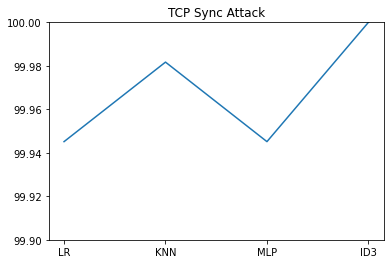

In [ ]:
plt.plot(classifiers,scores)
plt.title("TCP Sync Attack")
plt.ylim(99.9,100)
plt.show()